# Truncated Bessel Beam

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cmplt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import ScalarBesselGaussBeamSuperposition
from particle import SphericalParticle

fig_num = 0

### Beam definition

In [3]:
tbb = ScalarBesselGaussBeamSuperposition()
tbb.medium_refractive_index=1.33
tbb.vacuum_wavelength=1064e-9
tbb.R = 1e-3
tbb.q = 0
tbb.N = 21
tbb.axicon_angle_degree = 6
tbb.electric_field_direction = lambda x1, x2, x3, s: [1, 0, 0]
tbb.wavenumber_direction = lambda x1, x2, x3, s: [0, 0, 1]

### 2D plot

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


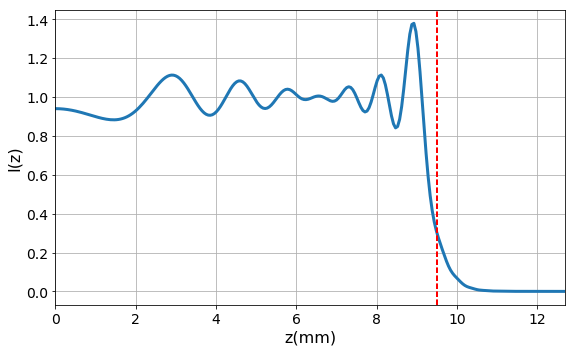

In [4]:
z = np.linspace(0, 4/3*tbb.zmax, 251)

fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

plt.plot([z*1e3 for z in z], [tbb.intensity(0, 0, z) for z in z], lw=3)
plt.legend(fontsize=12, loc=1)
plt.xlim([0, 4/3*tbb.zmax*1e3])
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'z(mm)', fontsize=16)
plt.ylabel('I(z)', fontsize=16)
plt.axvline(x=tbb.zmax*1e3, color='r', linestyle='--', lw=2)
plt.grid()
plt.tight_layout()
plt.savefig('perfil-2D.png', dpi=300)
plt.show()

### 3D plot

In [5]:
rho_max = 40e-6
z_max = 4/3*tbb.zmax

rho = np.linspace(-rho_max, rho_max, 121)
z = np.linspace(0, z_max, 121)
RHO, Z = np.meshgrid(rho, z)

vinty = np.vectorize(lambda rho, z: tbb.intensity(rho, 0, z, 'cylindrical'))

INTY = vinty(RHO, Z)

RHO = [rho*1e6 for rho in RHO]
Z = [z*1e3 for z in Z]

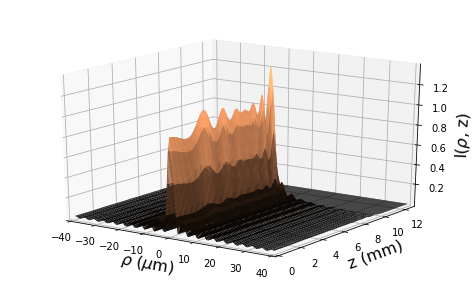

In [6]:
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))
ax = plt.gca(projection='3d')

# https://matplotlib.org/examples/color/colormaps_reference.html
ax.plot_surface(RHO, Z, INTY, rcount=1000, ccount=1000, alpha=1, cmap=cmplt.copper)
#cset = ax.contourf(RHO, Z, INTY, zdir='z', offset=0, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='x', offset=-Rmax, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='y', offset=Zmax, cmap=cmplt.coolwarm)

ax.set_xlabel(r'$\rho$ ($\mu$m)', fontsize=16)
ax.set_xlim(-rho_max*1e6, rho_max*1e6)
ax.set_ylabel(r'z (mm)', fontsize=16)
ax.set_ylim(0, z_max*1e3)
ax.set_zlabel(r'I($\rho$, z)', fontsize=16)

ax.view_init(elev=20, azim=-55)

plt.savefig('perfil-3D.png', dpi=300)
plt.show()

### 4 kind longitudinal forces. nrel = 1.2

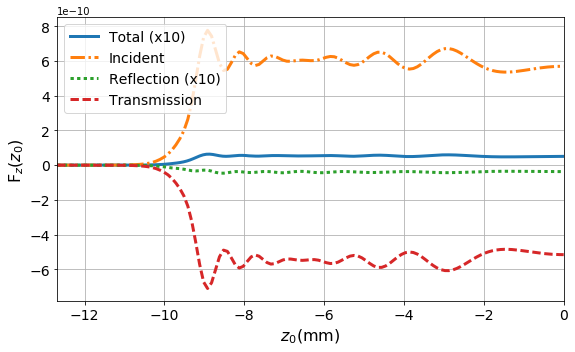

In [7]:
ptc = SphericalParticle()
ptc.radius = 18e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -4/3*tbb.zmax,
          'stop': 0,
          'num': 120,}
          
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc.refractive_index = 1.2*1.33

X1, F1 = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', paramx=paramx)
plt.plot([x*1e3 for x in X1], [1*f for f in F1], lw=3, label='Total (x10)')

X1I, F1I = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', force_type='incident', paramx=paramx)
plt.plot([x*1e3 for x in X1I], [1*f for f in F1I], '-.', lw=3, label='Incident')

X1R, F1R = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', force_type='reflection', paramx=paramx)
plt.plot([x*1e3 for x in X1R], [10*f for f in F1R], ':', lw=3, label='Reflection (x10)')

X1T, F1T = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', force_type='transmission', paramx=paramx)
plt.plot([x*1e3 for x in X1T], [1*f for f in F1T], '--', lw=3, label='Transmission')

plt.xlim([paramx['start']*1e3, paramx['stop']*1e3])

plt.legend(fontsize=14, loc=2)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'$z_0$(mm)', fontsize=16)
plt.ylabel(r'F$_z$($z_0$)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('longit-4kind-forces-nrel=1o20.png', dpi=300)

plt.show()


### 4 kind longitudinal forces. nrel = 1.01

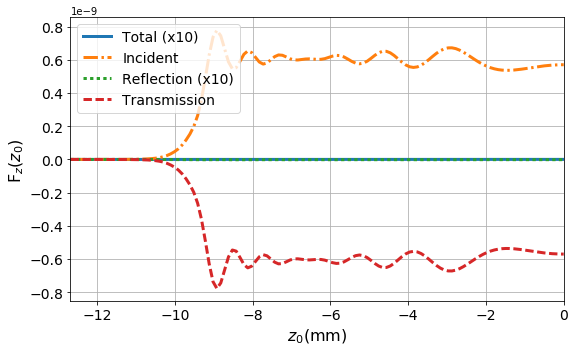

In [8]:
ptc = SphericalParticle()
ptc.radius = 18e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -4/3*tbb.zmax,
          'stop': 0,
          'num': 120,}
          
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc.refractive_index = 1.01*1.33

X2, F2 = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', paramx=paramx)
plt.plot([x*1e3 for x in X2], [1*f for f in F2], lw=3, label='Total (x10)')

X2I, F2I = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', force_type='incident', paramx=paramx)
plt.plot([x*1e3 for x in X2I], [1*f for f in F2I], '-.', lw=3, label='Incident')

X2R, F2R = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', force_type='reflection', paramx=paramx)
plt.plot([x*1e3 for x in X2R], [10*f for f in F2R], ':', lw=3, label='Reflection (x10)')

X2T, F2T = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', force_type='transmission', paramx=paramx)
plt.plot([x*1e3 for x in X2T], [1*f for f in F2T], '--', lw=3, label='Transmission')

plt.xlim([paramx['start']*1e3, paramx['stop']*1e3])

plt.legend(fontsize=14, loc=2)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'$z_0$(mm)', fontsize=16)
plt.ylabel(r'F$_z$($z_0$)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('longit-4kind-forces-nrel=1o01.png', dpi=300)

plt.show()


### 4 kind longitudinal forces. nrel = 0.95

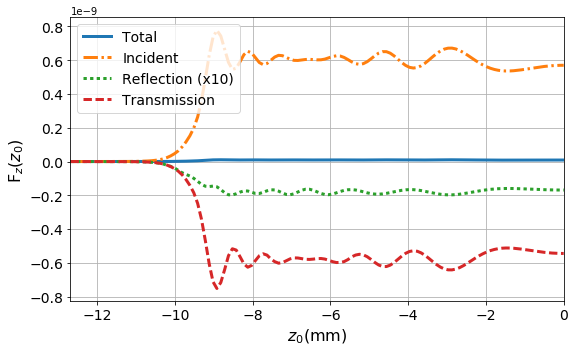

In [9]:
ptc = SphericalParticle()
ptc.radius = 18e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -4/3*tbb.zmax,
          'stop': 0,
          'num': 120,}
          
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc.refractive_index = 0.95*1.33

X3, F3 = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', paramx=paramx)
plt.plot([x*1e3 for x in X3], [1*f for f in F3], lw=3, label='Total')

X3I, F3I = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', force_type='incident', paramx=paramx)
plt.plot([x*1e3 for x in X3I], [1*f for f in F3I], '-.', lw=3, label='Incident')

X3R, F3R = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', force_type='reflection', paramx=paramx)
plt.plot([x*1e3 for x in X3R], [10*f for f in F3R], ':', lw=3, label='Reflection (x10)')

X3T, F3T = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', force_type='transmission', paramx=paramx)
plt.plot([x*1e3 for x in X3T], [1*f for f in F3T], '--', lw=3, label='Transmission')

plt.xlim([paramx['start']*1e3, paramx['stop']*1e3])

plt.legend(fontsize=14, loc=2)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'$z_0$(mm)', fontsize=16)
plt.ylabel(r'F$_z$($z_0$)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('longit-4kind-forces-nrel=0o95.png', dpi=300)

plt.show()


### Longitudinal force x z0 with rho = 0

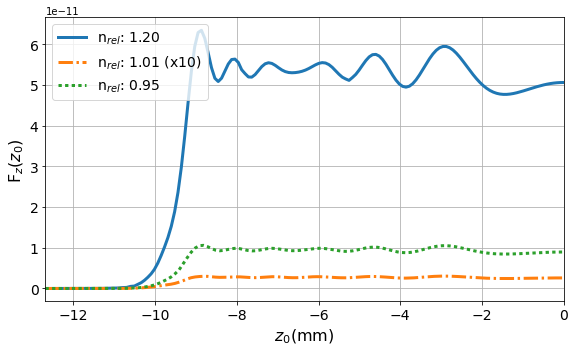

In [10]:
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc = SphericalParticle()
ptc.radius = 18e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -4/3*tbb.zmax,
          'stop': 0,
          'num': 120,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([x*1e3 for x in X1], [1*f for f in F1], lw=3, label=label)

ptc.refractive_index = 1.01*1.33
X2, F2 = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f (x10)' % (ptc.refractive_index/1.33)
plt.plot([x*1e3 for x in X2], [10*f for f in F2], '-.', lw=3, label=label)

ptc.refractive_index = 0.95*1.33
X3, F3 = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([x*1e3 for x in X3], [1*f for f in F3], ':', lw=3, label=label)

plt.xlim([paramx['start']*1e3, paramx['stop']*1e3])

plt.legend(fontsize=14, loc=2)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'$z_0$(mm)', fontsize=16)
plt.ylabel(r'F$_z$($z_0$)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('longit-forces.png', dpi=300)

plt.show()

### Longitudinal force x x0 with z0 = -zmax

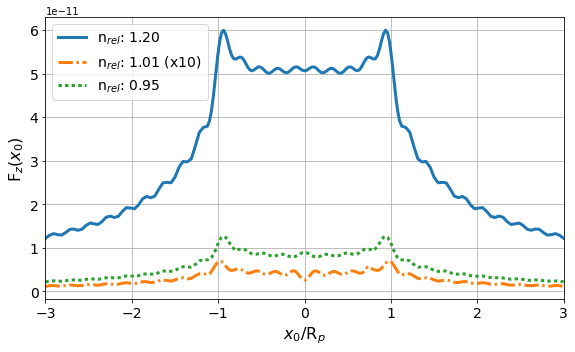

In [11]:
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc = SphericalParticle()
ptc.radius = 18e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_x',
          'start': -3*ptc.radius,
          'stop': 3*ptc.radius,
          'num': 50,}

ptc.refractive_index = 1.2*1.33
X1x, F1x = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([x/ptc.radius for x in X1x], [1*f for f in F1x], lw=3, label=label)

ptc.refractive_index = 1.01*1.33
X2x, F2x = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f (x10)' % (ptc.refractive_index/1.33)
plt.plot([x/ptc.radius for x in X2x], [10*f for f in F2x], '-.', lw=3, label=label)

ptc.refractive_index = 0.95*1.33
X3x, F3x = ptc.geo_opt_force(tbb, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([x/ptc.radius for x in X3x], [1*f for f in F3x], ':', lw=3, label=label)

plt.xlim([paramx['start']/ptc.radius, paramx['stop']/ptc.radius])

plt.legend(fontsize=14, loc=2)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'$x_0$/R$_p$', fontsize=16)
plt.ylabel(r'F$_z$($x_0$)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('longit-forces.png', dpi=300)

plt.show()